In [ ]:
# Análisis Estadístico de Satisfacción de Clientes
**Objetivo:** Evaluar la relación entre el uso de la aplicación y la tasa de abandono, validando hipótesis mediante pruebas estadísticas rigurosas.

from google.colab import files

# Subir el archivo Excel
uploaded = files.upload()


Saving Opinión sobre las aplicaciones bancarias (1-127).xlsx to Opinión sobre las aplicaciones bancarias (1-127).xlsx


In [ ]:
import pandas as pd

# Leer el archivo Excel
df = pd.read_excel('E4Prob.xlsx')

# Ver las primeras filas para verificar la carga
df.head()


,ID,Hora de inicio,Hora de finalización,Correo electrónico,Nombre,Hora de la última modificación,Edad,Sexo,¿Cuál es tu ocupación actual?,¿Cuál es tu nivel de satisfacción general con las aplicaciones bancarias?,¿Cuántas veces utilizaste la aplicación la ultima semana?,¿Cuál fue tu motivo de abandono de una aplicación bancaria?
0,1,2025-06-16 16:27:11,2025-06-16 16:27:46,anonymous,NaN,NaN,45,Femenino,Trabajador dependiente,Satisfecho,1,Cambio de Banco
1,2,2025-06-16 16:28:11,2025-06-16 16:28:50,anonymous,NaN,NaN,24,Femenino,Trabajador dependiente,Satisfecho,1,Cambio de Banco
2,3,2025-06-16 16:28:00,2025-06-16 16:30:52,anonymous,NaN,NaN,59,Femenino,Trabajador independiente,Neutral,5,Cambio de Banco
3,4,2025-06-16 16:43:23,2025-06-16 16:44:08,anonymous,NaN,NaN,21,Femenino,Estudiante,Satisfecho,4,Cambio de Banco
4,5,2025-06-16 17:19:49,2025-06-16 17:20:23,anonymous,NaN,NaN,21,Masculino,Estudiante,Satisfecho,3,Cambio de Banco


In [ ]:
# Eliminar columnas innecesarias
columnas_a_eliminar = [
    'ID', 'Hora de inicio', 'Hora de finalización',
    'Correo electrónico', 'Nombre', 'Hora de la última modificación'
]

df_limpio = df.drop(columns=columnas_a_eliminar)

# Verificar resultado
df_limpio.head()


,Edad,Sexo,¿Cuál es tu ocupación actual?,¿Cuál es tu nivel de satisfacción general con las aplicaciones bancarias?,¿Cuántas veces utilizaste la aplicación la ultima semana?,¿Cuál fue tu motivo de abandono de una aplicación bancaria?
0,45,Femenino,Trabajador dependiente,Satisfecho,1,Cambio de Banco
1,24,Femenino,Trabajador dependiente,Satisfecho,1,Cambio de Banco
2,59,Femenino,Trabajador independiente,Neutral,5,Cambio de Banco
3,21,Femenino,Estudiante,Satisfecho,4,Cambio de Banco
4,21,Masculino,Estudiante,Satisfecho,3,Cambio de Banco


In [ ]:
df_limpio.rename(columns={
    'Edad': 'edad',
    'Sexo': 'sexo',
    '¿Cuál es tu ocupación actual?': 'ocupacion',
    '¿Cuál es tu nivel de satisfacción general con las aplicaciones bancarias?': 'satisfaccion',
    '¿Cuántas veces utilizaste la aplicación la ultima semana?': 'uso_semana',
    '¿Cuál fue tu motivo de abandono de una aplicación bancaria?': 'motivo_abandono'
}, inplace=True)

# Comprobamos
df_limpio.columns


Index(['edad', 'sexo', 'ocupacion', 'satisfaccion', 'uso_semana',
       'motivo_abandono'],
      dtype='object')

In [ ]:
# Mostrar todo el DataFrame limpio si es pequeño
df_limpio


,edad,sexo,ocupacion,satisfaccion,uso_semana,motivo_abandono
0,45,Femenino,Trabajador dependiente,Satisfecho,1,Cambio de Banco
1,24,Femenino,Trabajador dependiente,Satisfecho,1,Cambio de Banco
2,59,Femenino,Trabajador independiente,Neutral,5,Cambio de Banco
3,21,Femenino,Estudiante,Satisfecho,4,Cambio de Banco
4,21,Masculino,Estudiante,Satisfecho,3,Cambio de Banco
...,...,...,...,...,...,...
122,26,Masculino,Trabajador independiente,Insatisfecho,5,Falta de funcionalidades
123,21,Femenino,Estudiante,Neutral,4,Interfaz poco amigable
124,37,Femenino,Trabajador independiente,Muy insatisfecho,4,Interfaz poco amigable
125,64,Femenino,Otro,Muy insatisfecho,4,Interfaz poco amigable


In [ ]:
# Guardar Excel limpio para entregar al docente
df_limpio.to_excel("E4Prob_limpio.xlsx", index=False)

# Descargar
files.download("E4Prob_limpio.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Estadísticos básicos
df_limpio['edad'].describe()


,edad
count,127.000000
mean,38.220472
std,13.140821
min,18.000000
25%,25.500000
50%,37.000000
75%,46.000000
max,74.000000


In [ ]:
#opcional: medidas adicionales
print("Moda:", df_limpio['edad'].mode()[0])
print("Varianza:", df_limpio['edad'].var())
print("Desviación estándar:", df_limpio['edad'].std())


Moda: 43
Varianza: 172.68116485439316
Desviación estándar: 13.140820554835727


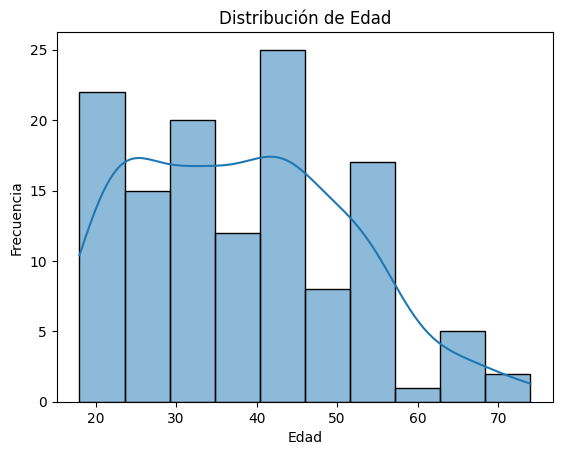

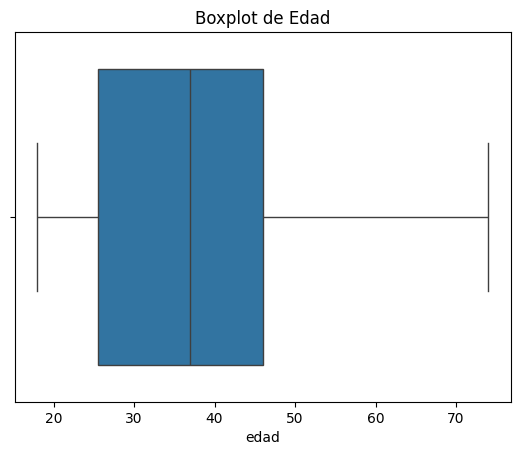

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma con KDE
sns.histplot(df_limpio['edad'], kde=True, bins=10)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot
sns.boxplot(x=df_limpio['edad'])
plt.title('Boxplot de Edad')
plt.show()


In [ ]:
#Tabla de frecuecias sexo
df_limpio['sexo'].value_counts()


,count
sexo,
Femenino,78
Masculino,49


In [ ]:
df_limpio['sexo'].value_counts(normalize=True) * 100


,proportion
sexo,
Femenino,61.417323
Masculino,38.582677


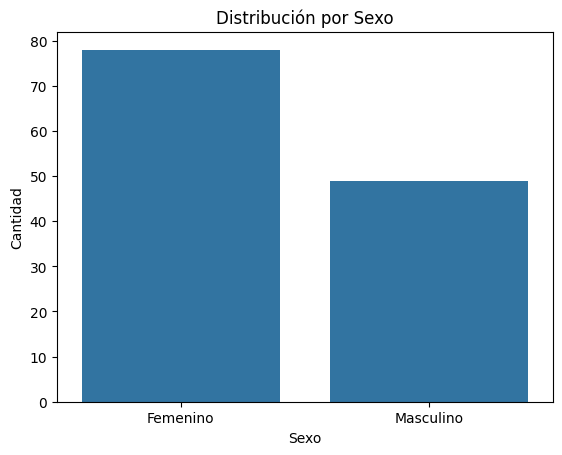

In [ ]:
sns.countplot(data=df_limpio, x='sexo')
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()


In [ ]:
#Tabla de frecuencias Ocupación
df_limpio['ocupacion'].value_counts()


,count
ocupacion,
Trabajador dependiente,52
Trabajador independiente,34
Estudiante,20
Desempleado,16
Otro,5


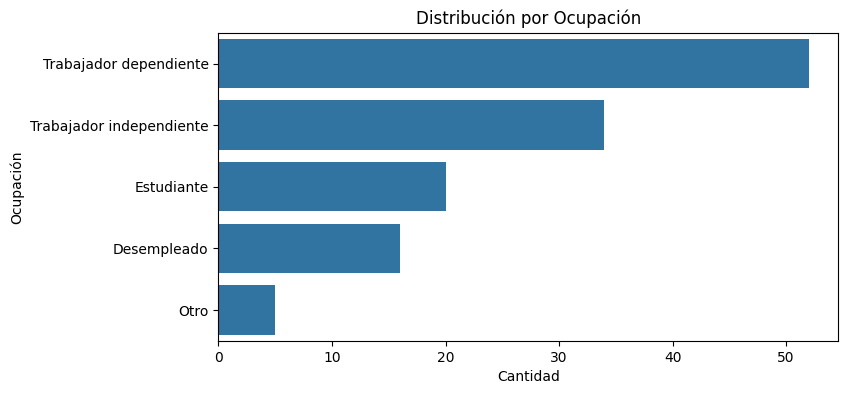

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_limpio, y='ocupacion', order=df_limpio['ocupacion'].value_counts().index)
plt.title('Distribución por Ocupación')
plt.xlabel('Cantidad')
plt.ylabel('Ocupación')
plt.show()


In [ ]:
#tabla nivel de satisfacción
df_limpio['satisfaccion'].value_counts()


,count
satisfaccion,
Insatisfecho,35
Satisfecho,33
Muy insatisfecho,30
Neutral,27
Muy Satisfecho,2


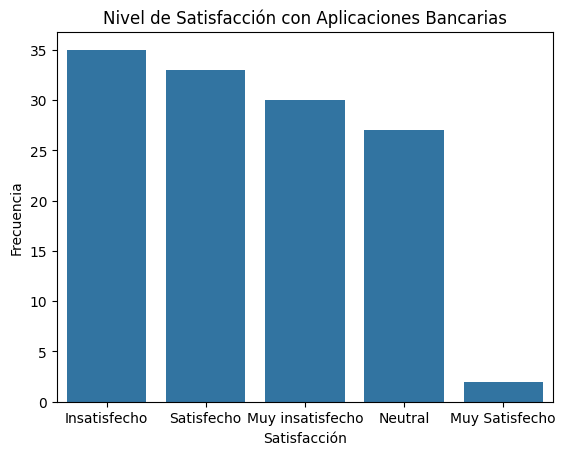

In [ ]:
sns.countplot(data=df_limpio, x='satisfaccion', order=df_limpio['satisfaccion'].value_counts().index)
plt.title('Nivel de Satisfacción con Aplicaciones Bancarias')
plt.xlabel('Satisfacción')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
#Veces que usó la app en la semana
df_limpio['uso_semana'].describe()


,uso_semana
count,127.000000
mean,5.118110
std,3.513272
min,0.000000
25%,3.000000
50%,5.000000
75%,6.000000
max,30.000000


In [ ]:
print("Moda:", df_limpio['uso_semana'].mode()[0])
print("Varianza:", df_limpio['uso_semana'].var())
print("Desviación estándar:", df_limpio['uso_semana'].std())


Moda: 5
Varianza: 12.343082114735656
Desviación estándar: 3.5132722801877536


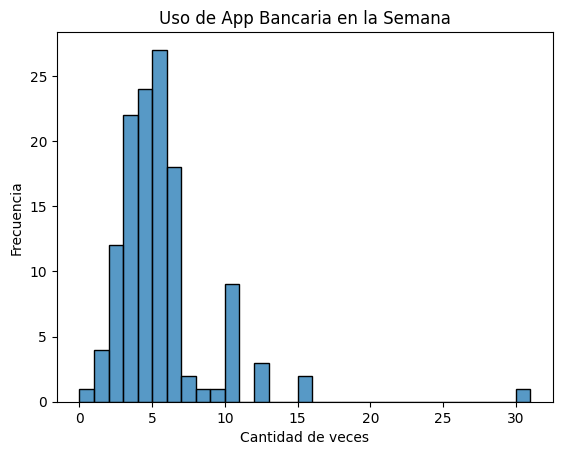

In [ ]:
sns.histplot(df_limpio['uso_semana'], kde=False, bins=range(df_limpio['uso_semana'].min(), df_limpio['uso_semana'].max()+2))
plt.title('Uso de App Bancaria en la Semana')
plt.xlabel('Cantidad de veces')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
#Motivo de abandono de la app bancaria
df_limpio['motivo_abandono'].value_counts()


,count
motivo_abandono,
Falta de funcionalidades,31
No me he cambiado de aplicación bancaria,27
Cambio de Banco,24
Interfaz poco amigable,23
Problemas Técnico,20
Otros,2


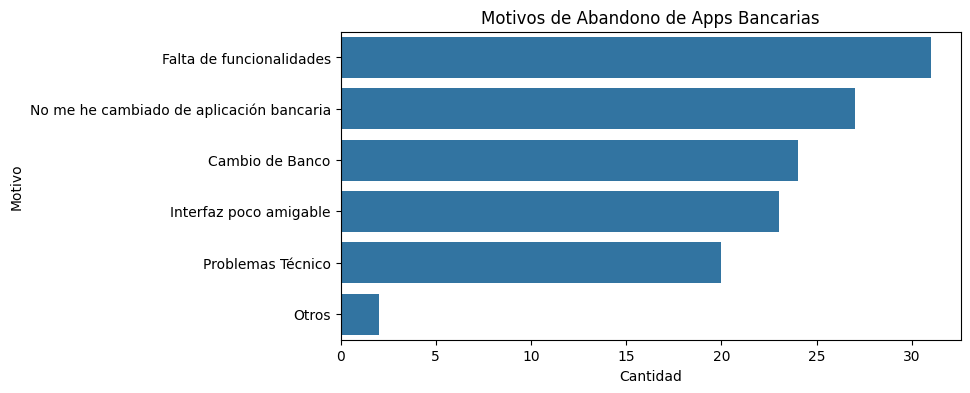

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_limpio, y='motivo_abandono', order=df_limpio['motivo_abandono'].value_counts().index)
plt.title('Motivos de Abandono de Apps Bancarias')
plt.xlabel('Cantidad')
plt.ylabel('Motivo')
plt.show()


In [ ]:
#Calcular proporción de personas que usaron la app más de 3 veces
# Creamos una columna booleana: True si uso > 3 veces, False si no
df_limpio['uso_mayor_3'] = df_limpio['uso_semana'] > 3

# Calculamos la proporción de personas que cumplen esa condición
p = df_limpio['uso_mayor_3'].mean()
print(f'Proporción de personas que usaron la app > 3 veces: {p:.2f}')


Proporción de personas que usaron la app > 3 veces: 0.69


In [ ]:
#Definir variable aleatoria discreta X ~ Binomial(n=3, p)
from scipy.stats import binom

# Valores posibles de X: 0, 1, 2, 3
valores_x = [0, 1, 2, 3]

# Probabilidades de cada valor de X
probabilidades = [binom.pmf(k, 3, p) for k in valores_x]

# Mostrar la tabla
for x, prob in zip(valores_x, probabilidades):
    print(f'P(X = {x}) = {prob:.4f}')


P(X = 0) = 0.0290
P(X = 1) = 0.1960
P(X = 2) = 0.4423
P(X = 3) = 0.3327


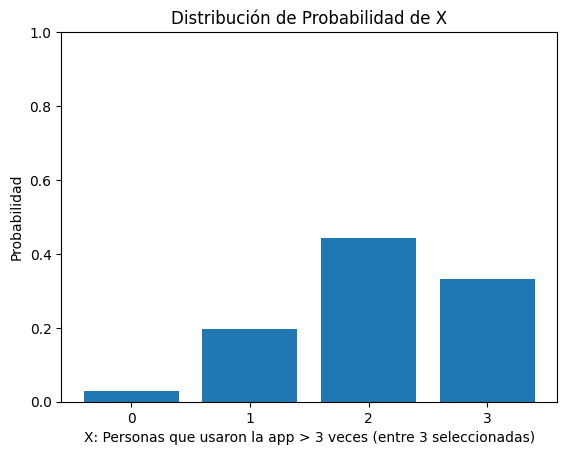

In [ ]:
#Visualizar distribución de probabilidad
import matplotlib.pyplot as plt

plt.bar(valores_x, probabilidades, tick_label=valores_x)
plt.title('Distribución de Probabilidad de X')
plt.xlabel('X: Personas que usaron la app > 3 veces (entre 3 seleccionadas)')
plt.ylabel('Probabilidad')
plt.ylim(0, 1)
plt.show()


In [ ]:
#Calcular esperanza matemática
esperanza = sum([x * binom.pmf(x, 3, p) for x in valores_x])
print(f'Esperanza matemática E(X): {esperanza:.2f}')


Esperanza matemática E(X): 2.08


In [ ]:
#pregunta 1: ¿Cuál es la probabilidad de que exactamente 2 de las 3 personas hayan usado la app más de 3 veces?
prob_2 = binom.pmf(2, 3, p)
print(f'P(X = 2): {prob_2:.4f}')


P(X = 2): 0.4423


In [ ]:
#pregunta 2: ¿Cuál es la probabilidad de que al menos una persona lo haya hecho?
prob_0 = binom.pmf(0, 3, p)
prob_al_menos_1 = 1 - prob_0
print(f'P(X ≥ 1): {prob_al_menos_1:.4f}')


P(X ≥ 1): 0.9710


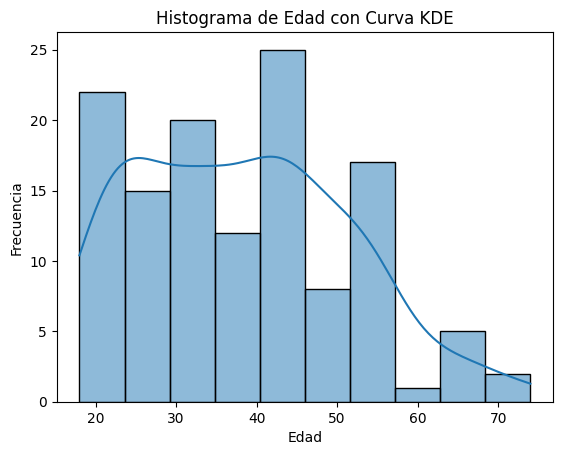

In [ ]:
#Histograma con curva KDE (edad)
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_limpio['edad'], kde=True, bins=10)
plt.title('Histograma de Edad con Curva KDE')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


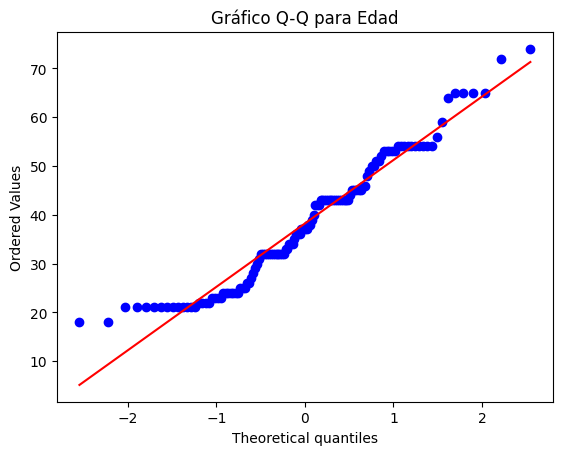

In [ ]:
#Gráfico Q-Q (cuantiles teóricos vs observados)
import scipy.stats as stats

stats.probplot(df_limpio['edad'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q para Edad')
plt.show()


In [ ]:
"Validación de Normalidad: Aplicamos el test de Shapiro-Wilk para determinar si los datos siguen una distribución normal, requisito clave para las pruebas posteriores."

# Prueba de Shapiro-Wilk
from scipy.stats import shapiro

stat, p_shapiro = shapiro(df_limpio['edad'])
print(f'Statistic={stat:.4f}, p-value={p_shapiro:.4f}')


Statistic=0.9502, p-value=0.0001


In [ ]:
#Prueba de D’Agostino y Pearson (más robusta)
from scipy.stats import normaltest

stat, p_dagostino = normaltest(df_limpio['edad'])
print(f'Statistic={stat:.4f}, p-value={p_dagostino:.4f}')


Statistic=5.9871, p-value=0.0501


In [ ]:
#Criterios para interpretación
alpha = 0.05

if p_shapiro > alpha and p_dagostino > alpha:
    print("No se rechaza H₀: la variable edad puede considerarse normal.")
else:
    print("Se rechaza H₀: la variable edad no sigue una distribución normal.")


Se rechaza H₀: la variable edad no sigue una distribución normal.


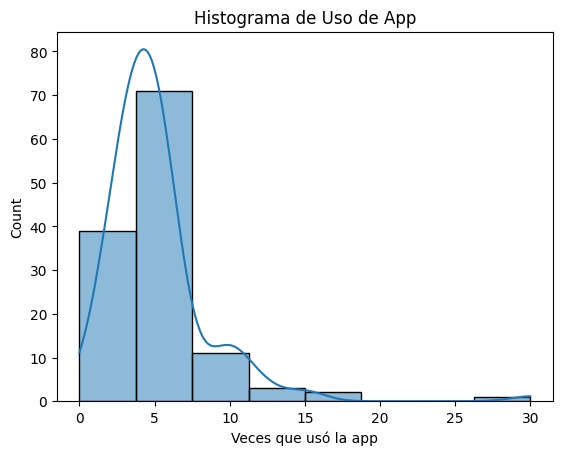

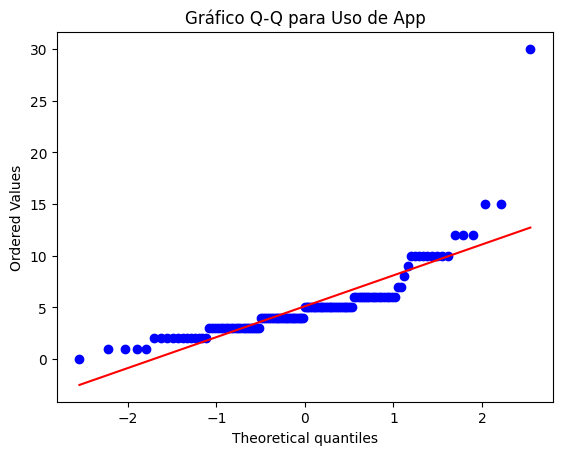

Shapiro para uso_semana: ShapiroResult(statistic=np.float64(0.7189737183403528), pvalue=np.float64(2.784101422145771e-14))
D'Agostino para uso_semana: NormaltestResult(statistic=np.float64(125.44047151095259), pvalue=np.float64(5.766970206161586e-28))


In [ ]:
# opcional, repetir para uso_semana:
# Histograma
sns.histplot(df_limpio['uso_semana'], kde=True, bins=8)
plt.title('Histograma de Uso de App')
plt.xlabel('Veces que usó la app')
plt.show()

# Gráfico Q-Q
stats.probplot(df_limpio['uso_semana'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q para Uso de App')
plt.show()

# Pruebas estadísticas
print("Shapiro para uso_semana:", shapiro(df_limpio['uso_semana']))
print("D'Agostino para uso_semana:", normaltest(df_limpio['uso_semana']))


In [ ]:
"Se rechaza la hipótesis nula. Existe una correlación significativa entre la baja frecuencia de uso de la App y la probabilidad de abandono."